<h1 align="center"> ФМИ. Disbalanced dataset.  Part 2 </h1>
<h1 align="center"> Credit card Fraud Detector </h1>


<h2> Введение </h2>

На данном семинаре мы будем реализовывать различные прогностические модели, чтобы проверить, насколько точно они определяют, является ли транзакция обычным платежом (non Fraud) или мошенничеством (Fraud).

<h4> По мотивам кейса, рассмотренного в Зимней школе СберУнивера </h4>

<h2> Наши цели: </h2>
<ul>
<li> Проанализировать полученные данные.</li>
<li> Решить проблему сильного дисбаланса классов.  </li>
<li>Построить модели на основе классических алгоритмов машинного обучения. </li>
<li> Провести сравнительный анализ классических подходов.</li>

## Описание данных и постановка задачи:
**Задача:** см ФМИ. Disbalanced dataset.Part 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as mpatches
import time

import collections
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

Подключимся к диску для загрузки данных.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загружаем данные.

In [3]:
# Будем загружать данные, полученные в предыдущем блокноте.
# См обновленный блокнот

new_df = pd.read_csv('/content/drive/MyDrive/content/creditcard_short.csv')
new_df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,147662,88813.0,2.008967,-0.431609,-1.796421,0.043593,0.505857,0.110526,-0.020067,0.052487,...,-0.262606,-0.844380,0.159866,-0.329912,-0.144805,0.286947,-0.103697,-0.072323,50.13,0
1,106998,70229.0,0.315642,1.636778,-1.519650,4.028571,-1.186794,-0.789813,-2.279807,0.472988,...,0.345921,-0.108002,-0.165442,0.279895,0.808783,0.117363,0.589595,0.309064,3.79,1
2,274816,166225.0,-1.105504,0.240102,1.926875,-0.785223,0.804714,-0.228019,0.652355,-0.234655,...,-0.263942,-0.558370,-0.396167,-0.661483,0.461506,-0.499019,-0.185290,-0.149917,49.99,0
3,177195,123078.0,-1.073820,0.415616,-2.273977,1.536844,-0.758697,-1.670381,-2.377140,0.090370,...,0.535542,0.863592,0.450743,-0.144228,-0.205609,-0.539073,0.503418,-0.237807,11.00,1
4,123238,76857.0,1.140208,1.156431,-1.471578,2.076278,0.774809,-1.002532,0.264948,0.013162,...,-0.387895,-0.866812,-0.121583,-0.356109,0.634573,-0.306311,0.094087,0.121065,1.00,1


In [4]:
new_df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,129355.598577,87090.197154,-2.368951,1.879420,-3.520823,2.228825,-1.615073,-0.686918,-2.805954,0.351324,...,0.349551,-0.008994,-0.020474,-0.062834,0.008649,0.014370,0.095480,0.034689,97.670010,0.500000
std,81508.290066,47005.493135,5.541846,3.643156,6.219969,3.256449,4.193742,1.739860,5.844188,4.861809,...,2.786037,1.173351,1.144232,0.561433,0.679263,0.467691,1.008389,0.426209,219.072085,0.500254
min,541.000000,406.000000,-30.552380,-8.402154,-31.103685,-4.380425,-22.105532,-6.406267,-43.557242,-41.044261,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-2.195973,0.000000,0.000000
25%,54480.250000,46464.750000,-2.877893,-0.149733,-5.120349,-0.107635,-1.776164,-1.559879,-3.078361,-0.191405,...,-0.191082,-0.580484,-0.245411,-0.398942,-0.327426,-0.301042,-0.054757,-0.056569,1.290000,0.000000
50%,132109.000000,79861.000000,-0.731096,0.965403,-1.346636,1.307945,-0.472470,-0.636956,-0.701317,0.183997,...,0.147569,0.024552,-0.027673,-0.001328,0.044121,-0.011590,0.052405,0.035099,18.960000,0.500000
75%,192609.750000,129775.000000,1.078540,2.908700,0.321187,4.276079,0.479390,0.067752,0.230603,0.934022,...,0.621766,0.597643,0.203232,0.355417,0.380059,0.307892,0.432265,0.212483,99.990000,1.000000
max,284795.000000,172778.000000,2.351693,22.057729,3.267107,12.114672,11.095089,6.474115,8.023282,20.007208,...,27.202839,8.361985,5.466230,1.215815,2.208209,2.745261,3.052358,1.779364,2125.870000,1.000000


In [5]:
df = pd.read_csv('/content/drive/MyDrive/content/creditcard_full.csv')
df.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,199742,133112.0,1.570653,-1.583754,-1.120449,-0.388292,-1.150111,-1.038408,-0.044120,-0.321186,...,-0.615552,-1.980661,0.349290,-0.125742,-0.836879,-0.562662,-0.054156,0.014145,303.43,0
1,140653,83850.0,1.177101,0.319671,-0.434536,0.741223,-0.030279,-0.794863,0.044555,0.101871,...,-0.075071,-0.288999,-0.005877,0.066588,0.353802,0.376986,-0.037939,0.019573,0.76,0
2,264920,161656.0,-0.402853,0.373431,0.404036,-0.526837,0.511320,1.231913,-0.528942,1.026851,...,0.146855,0.386569,0.265225,-1.460517,-1.282918,-0.568904,0.110366,0.008460,1.00,0
3,193730,130268.0,2.122708,-0.837441,-1.207116,-0.775841,-0.201743,0.134036,-0.562581,-0.035908,...,-0.864634,-2.043560,0.399044,-1.456099,-0.639199,0.103567,-0.043304,-0.059882,43.90,0
4,215408,140057.0,0.591911,1.037842,-1.161486,0.472544,1.317614,-0.393012,1.335270,-0.455560,...,0.275192,1.006893,-0.208760,0.140442,-0.603213,0.529089,0.230988,0.236849,23.00,0


In [6]:
df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,142403.000000,94813.859575,1.176458e-15,3.380484e-16,-1.400094e-15,2.094153e-15,1.006012e-15,1.495995e-15,-5.623329e-16,1.141630e-16,...,1.612653e-16,-3.507221e-16,2.626299e-16,4.472966e-15,5.150809e-16,1.685427e-15,-3.659155e-16,-1.228138e-16,88.349619,0.001727
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,71201.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,142403.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,213604.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,284806.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
'''
Работаем с маленьким датасетом new_df
Делаем из него 2 набора.
В первом - все столбцы, но нет целевой переменной.
Во втором - столбец с целевой переменной.
'''


X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [8]:
# Про масштабирование мы с вами уже в курсе. Опять используем RobustScaler

from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify = y)

X_train['scaled_amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_test['scaled_amount'] = rob_scaler.fit_transform(X_test['Amount'].values.reshape(-1,1))

X_train['scaled_time'] = rob_scaler.fit_transform(X_train['Time'].values.reshape(-1,1))
X_test['scaled_time'] = rob_scaler.fit_transform(X_test['Time'].values.reshape(-1,1))


# удаляем из трейн и тест датасетов  столбцы Time и Amount,
# так как у нас уже есть их отмасштабированные версии
X_train.drop(['Time','Amount'], axis=1, inplace=True)
X_test.drop(['Time','Amount'], axis=1, inplace=True)

In [9]:
# Переводим данные в массив для подачи в классификатор
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC

# Выберем несколько простых моделей из библиотеки sklearn

classifiers = {
    "RandomForestClassifier": RandomForestClassifier(),  # Метод случаного леса
    "GradientBoostingClassifier": GradientBoostingClassifier(),  # Градиентный бустинг
    "BernoulliNB": BernoulliNB(), # Наивный байесовский алгоритм Бернулли
    "LinearSVC": LinearSVC(), #
}

Для борьбы с переобучением будем использовать кросс-валидацию.

<img src="https://scikit-learn.ru/wp-content/uploads/2021/10/image-161.png" width=800>

Разобьем обучающую выборку на 5 фолдов и обучим наши модели.

In [11]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    #classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Модель ", classifier.__class__.__name__, "получила на обучающей выборке", round(training_score.mean(), 2) * 100, "% accuracy score")

Модель  RandomForestClassifier получила на обучающей выборке 94.0 % accuracy score
Модель  GradientBoostingClassifier получила на обучающей выборке 94.0 % accuracy score
Модель  BernoulliNB получила на обучающей выборке 90.0 % accuracy score
Модель  LinearSVC получила на обучающей выборке 93.0 % accuracy score


Для улучшения качества моделей переберем по сетке различные гиперпараметры методом GridSearchCV.


In [31]:
# Используем поиск по сетке для подбора гиперпараметров
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Random Forest
rf_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
grid_rf.fit(X_train, y_train)

rf_clf = grid_rf.best_estimator_

# Gradient Boosting
gb_params = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}
grid_gb = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5)
grid_gb.fit(X_train, y_train)

gb_clf = grid_gb.best_estimator_

# Параметры для BernoulliNB
bnb_params = {
    'alpha': [0.1, 0.5, 1.0],
}

grid_bnb = GridSearchCV(BernoulliNB(), bnb_params, cv=5)
grid_bnb.fit(X_train, y_train)

bnb_clf = grid_rf.best_estimator_

# Параметры для LinearSVC
svc_params = {
    'C': [0.01, 0.1, 1, 5],
    'max_iter': [1000, 2000],
    'loss': ['hinge', 'squared_hinge'],
}

grid_svc = GridSearchCV(LinearSVC(), svc_params, cv=5)
grid_svc.fit(X_train, y_train)

svc_clf = grid_rf.best_estimator_

In [32]:
# Проверим, как поменялись метрики

rf_score = cross_val_score(rf_clf, X_train, y_train, cv=5)
print('Random Forest Cross Validation Score: ', round(rf_score.mean() * 100, 2).astype(str) + '%')

gb_score = cross_val_score(gb_clf, X_train, y_train, cv=5)
print('Gradient Boosting Classifier Cross Validation Score: ', round(gb_score.mean() * 100, 2).astype(str) + '%')

bnb_score = cross_val_score(bnb_clf, X_train, y_train, cv=5)
print('BernoulliNB Cross Validation Score', round(bnb_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc_clf, X_train, y_train, cv=5)
print('Linnear SVC Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

Random Forest Cross Validation Score:  93.9%
Gradient Boosting Classifier Cross Validation Score:  93.9%
BernoulliNB Cross Validation Score 94.03%
Linnear SVC Classifier Cross Validation Score 94.03%


***До:***
  
  Модель  RandomForestClassifier получила на обучающей выборке 94.0 % accuracy score

  Модель  GradientBoostingClassifier получила на обучающей выборке 94.0 % accuracy score

  Модель  BernoulliNB получила на обучающей выборке 90.0 % accuracy score

  Модель  LinearSVC получила на обучающей выборке 93.0 % accuracy score



***После:***

Random Forest Cross Validation Score:  93.9%

Gradient Boosting Classifier Cross Validation Score:  93.9%

BernoulliNB Cross Validation Score 94.03%

Linnear SVC Classifier Cross Validation Score 94.03%

Ситуация улучшилась только для BernoulliNB, для RandomForest, LinnearSVC и GradientBoosting почти не изменилась.

Давайте теперь попробуем более умные способы undersampling. Например, с помощью NearMiss, который оценивает среднее расстояние между классами. Поможет нам в этом специальная библиотека для работы с несбалансированными даннными imblearn.

In [33]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

from sklearn.metrics import (precision_score, roc_auc_score, recall_score, f1_score, classification_report,
                             confusion_matrix, roc_curve, precision_recall_curve, accuracy_score)

undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

undersample_Xtrain, undersample_Xtest, undersample_ytrain, undersample_ytest = train_test_split(undersample_X, undersample_y,
                                                                                                test_size = 0.2,
                                                                                                random_state=42,
                                                                                                stratify = undersample_y)#

undersample_Xtrain['scaled_amount'] = rob_scaler.fit_transform(undersample_Xtrain['Amount'].values.reshape(-1,1))#
undersample_Xtest['scaled_amount'] = rob_scaler.fit_transform(undersample_Xtest['Amount'].values.reshape(-1,1))#

undersample_Xtrain['scaled_time'] = rob_scaler.fit_transform(undersample_Xtrain['Time'].values.reshape(-1,1))#
undersample_Xtest['scaled_time'] = rob_scaler.fit_transform(undersample_Xtest['Time'].values.reshape(-1,1))#

undersample_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
undersample_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Метод NearMiss
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss распределение классов: {}'.format(Counter(y_nearmiss)))
# Использовать сэмплирование будем во время кросс-валидации

for train, test in skf.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), rf_clf)#
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])#
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])#

    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test],
                                                           undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

NearMiss распределение классов: Counter({0: 492, 1: 492})


Построим кривую обучение каждой из модели. Данная кривая показывает различие между метриками во время обычного обучения и во время кросс-валидации.

In [34]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
import seaborn as sn

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, ax, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")

    ax.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Размер выборки')
    ax.set_ylabel('Score')
    ax.grid(True)
    ax.legend(loc="best")

def plot_learning_curves(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, axs = plt.subplots(2, 2, figsize=(20, 21), sharey=True)
    axs = axs.ravel()  # Преобразуем массив подграфиков в одномерный для удобства индексации
    if ylim is not None:
        plt.ylim(*ylim)

    plot_learning_curve(estimator1, axs[0], "Random Forest Classifier Learning Curve", X, y, ylim=ylim, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    plot_learning_curve(estimator2, axs[1], "Gradient Boosting Classifier Learning Curve", X, y, ylim=ylim, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    plot_learning_curve(estimator3, axs[2], "Bernoulli Naive Bayes Classifier Learning Curve", X, y, ylim=ylim, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    plot_learning_curve(estimator4, axs[3], "Linnear SVC Classifier Learning Curve", X, y, ylim=ylim, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    plt.tight_layout()
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

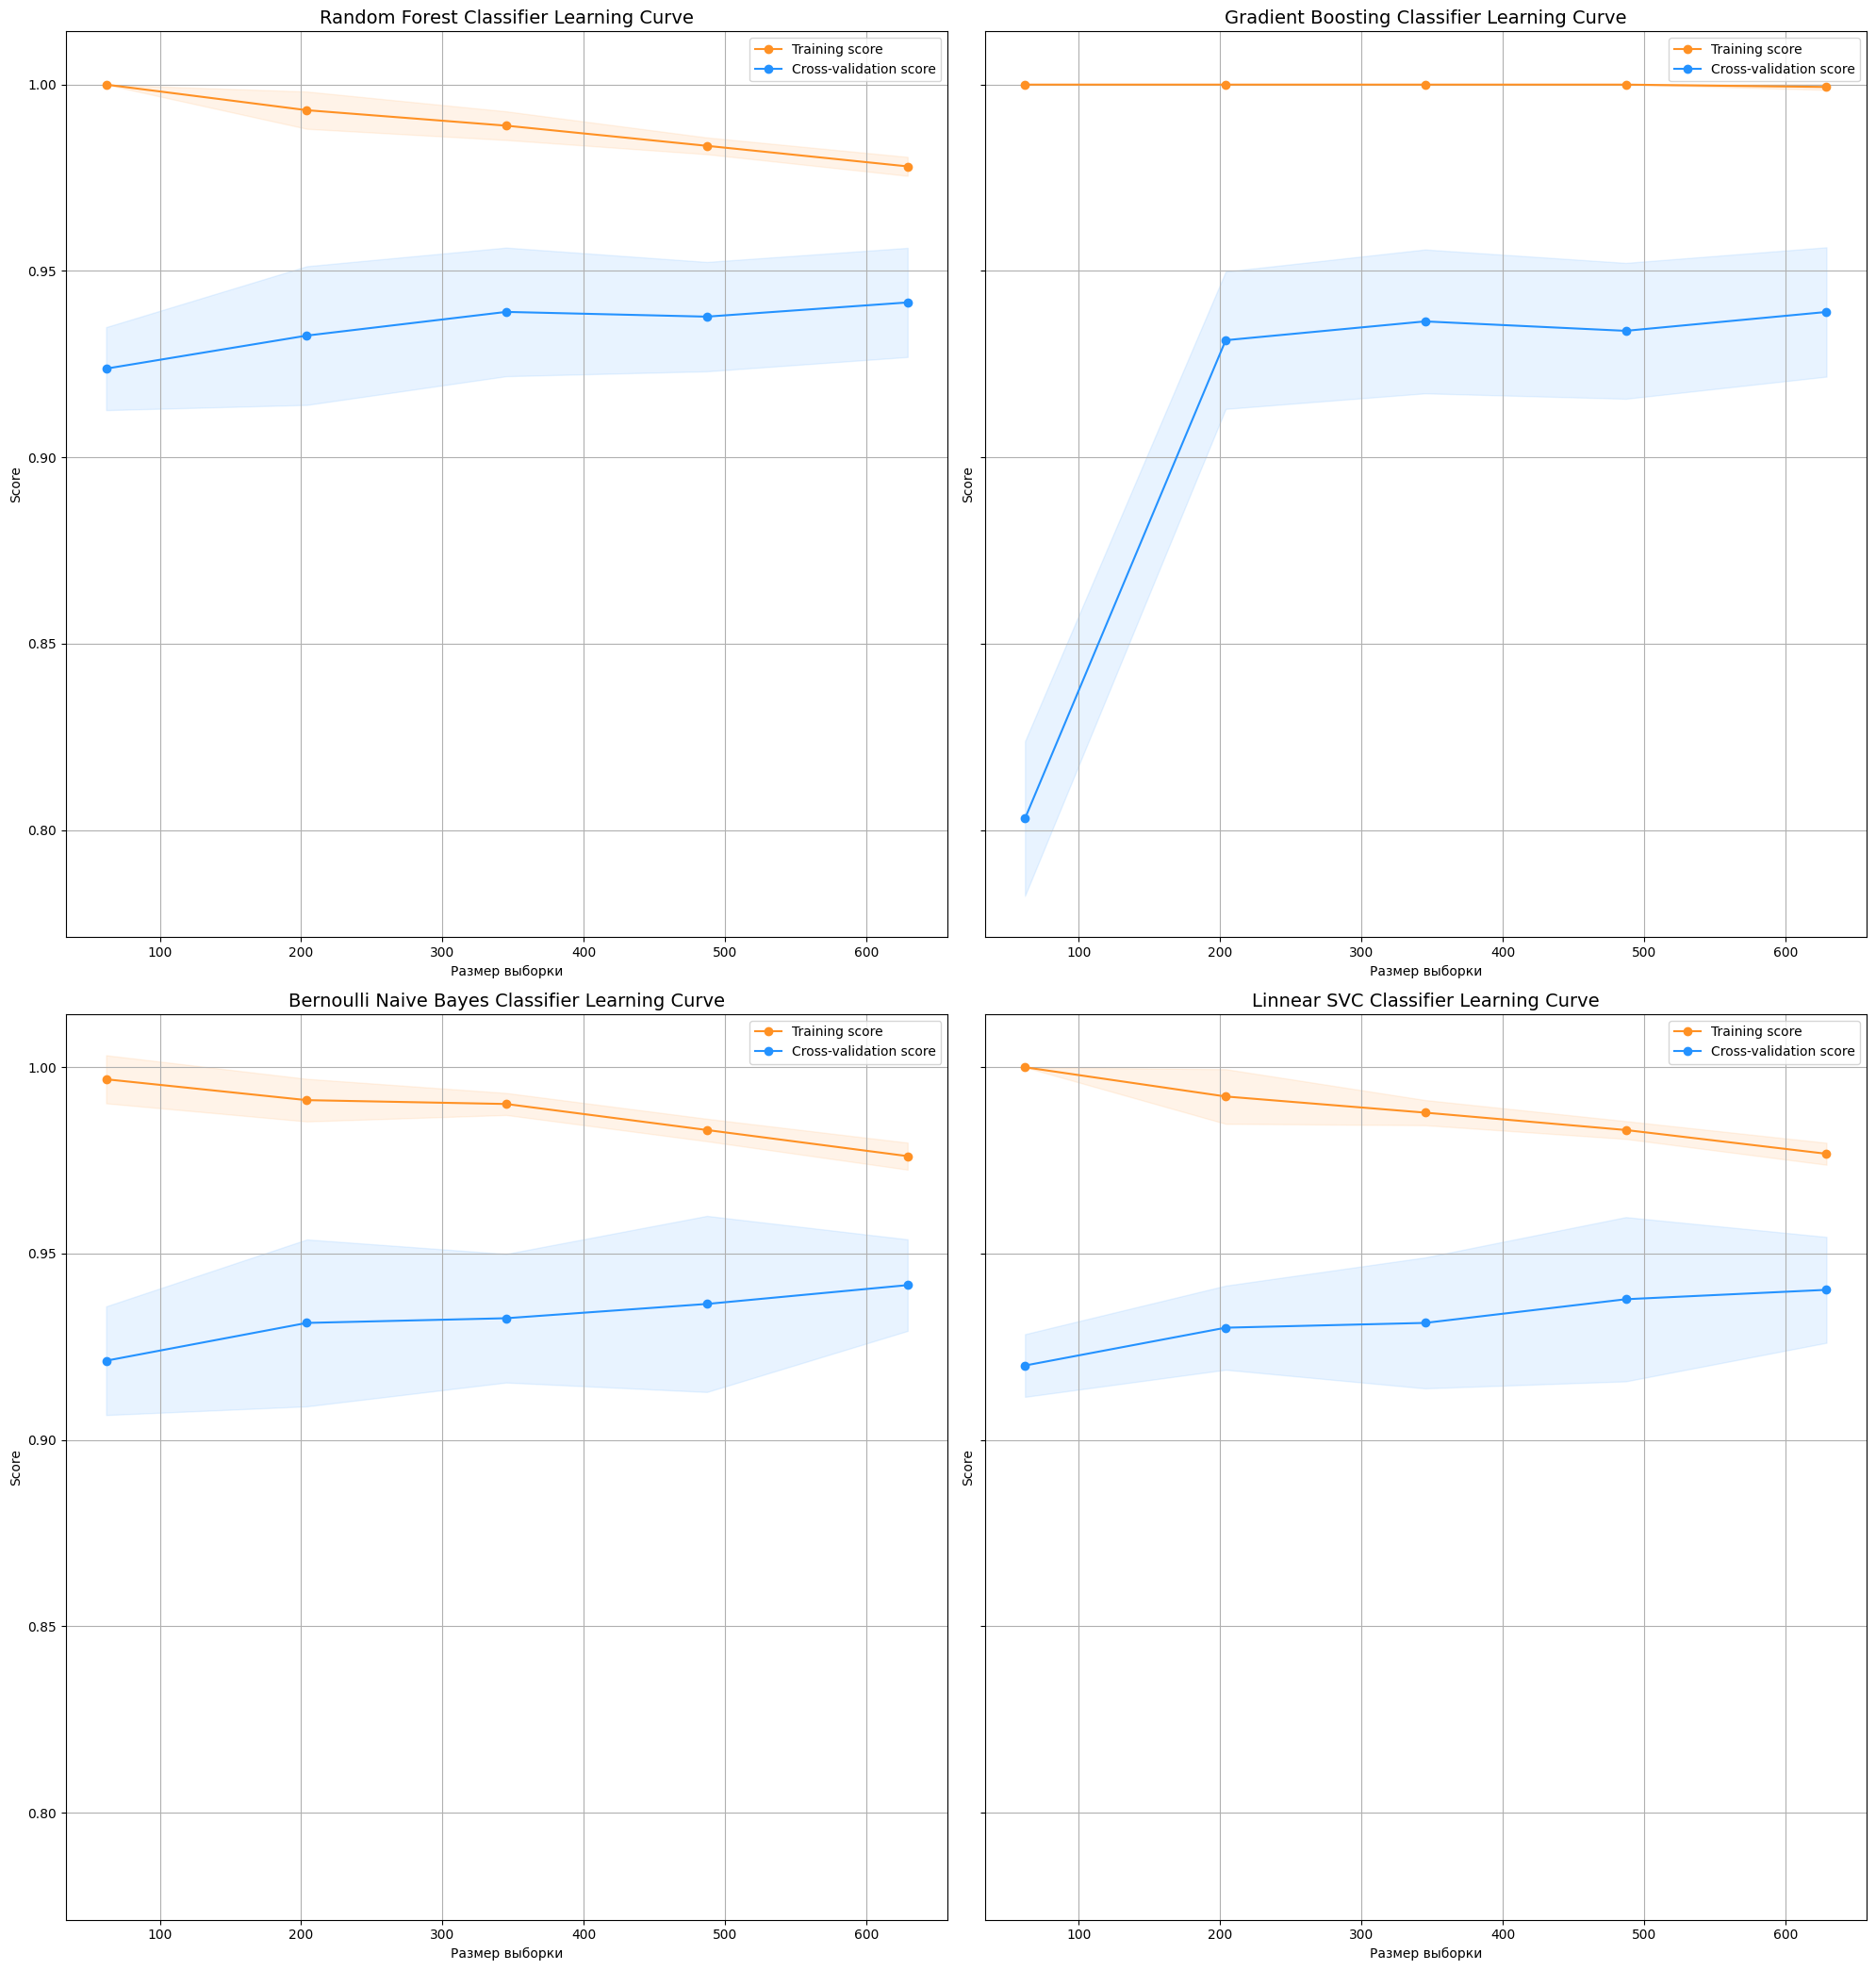

In [36]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curves(rf_clf, gb_clf, bnb_clf, svc_clf, X_train, y_train)

## Кривые обучения:
<ul>
<li>Чем больше разрыв между результатами обучения и результатами кросс-валидации, тем больше вероятность того, что модель переобучилась (большой разброс).</li>
<li> Если результаты низкие как на обучающем, так и на кросс-валидационном наборе, это указывает на то, что наша модель недообучилась (большое смещение).</li>
<li>Логистическая регрессия показала себя лучше остальных.</li>
</ul>

In [37]:
from sklearn.model_selection import cross_val_predict

rf_pred = cross_val_predict(rf_clf, X_train, y_train, cv=5)
gb_pred = cross_val_predict(gb_clf, X_train, y_train, cv=5)
bnb_pred = cross_val_predict(bnb_clf, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc_clf, X_train, y_train, cv=5)

In [38]:
print('Random Forest Classifier: ', roc_auc_score(y_train, rf_pred))
print('GradientBoosting Classifier Neighbors: ', roc_auc_score(y_train, gb_pred))
print('BernoulliNB Vector Classifier: ', roc_auc_score(y_train, bnb_pred))
print('LinearSVC Tree Classifier: ', roc_auc_score(y_train, svc_pred))

Random Forest Classifier:  0.9377849679027653
GradientBoosting Classifier Neighbors:  0.9390346288474702
BernoulliNB Vector Classifier:  0.9390604616318571
LinearSVC Tree Classifier:  0.9403294971648519


Построим roc-кривую и посчитаем площадь под ней.

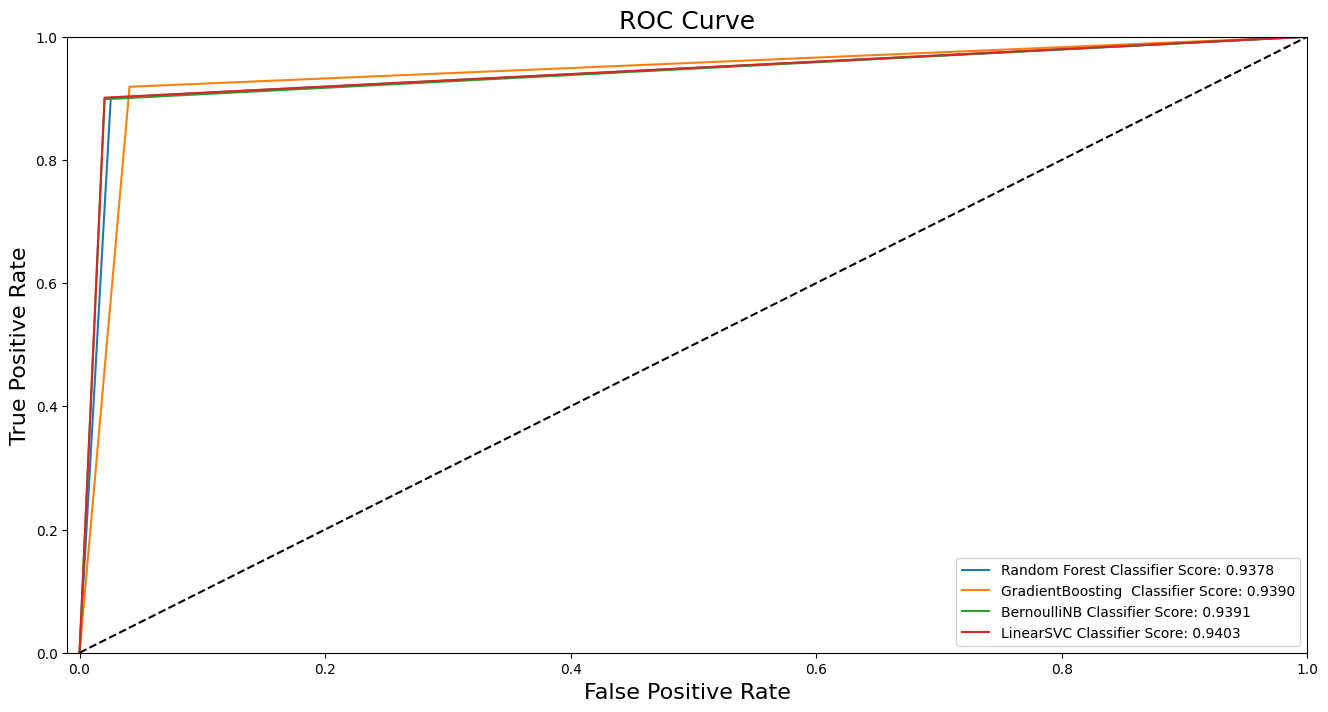

In [39]:
rf_fpr, rf_tpr, rf_thresold = roc_curve(y_train, rf_pred)
gb_fpr, gb_tpr, gb_threshold = roc_curve(y_train, gb_pred)
bnb_fpr, bnb_tpr, bnb_threshold = roc_curve(y_train, bnb_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)


def graph_roc_curve_multiple(rf_fpr, rf_tpr, gb_fpr, gb_tpr, bnb_fpr, bnb_tpr, svc_fpr, svc_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve', fontsize=18)

    plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, rf_pred)))
    plt.plot(gb_fpr, gb_tpr, label='GradientBoosting  Classifier Score: {:.4f}'.format(roc_auc_score(y_train, gb_pred)))
    plt.plot(bnb_fpr, bnb_tpr, label='BernoulliNB Classifier Score: {:.4f}'.format(roc_auc_score(y_train, bnb_pred)))
    plt.plot(svc_fpr, svc_tpr, label='LinearSVC Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

graph_roc_curve_multiple(rf_fpr, rf_tpr, gb_fpr, gb_tpr, bnb_fpr, bnb_tpr, svc_fpr, svc_tpr)
plt.show()

### SMOTE метод (Over-Sampling):

<b>SMOTE</b> означает Synthetic Minority Over-sampling Technique.  В отличие от Random Under-Sampling, SMOTE создает новые синтетические точки для того, чтобы создать баланс классов. Это еще одна альтернатива для решения проблемы дисбаланса классов. <br><br>


<b> Принцип работы SMOTE: </b>
<ul>
<li><b>Генерация синтетических точек: </b> SMOTE выбирает расстояние между ближайшими соседями меньшего класса и между ними создает синтетические точки. </li>
<li> <b>Преимущество:  </b> Сохраняется больше информации, поскольку нам не пришлось удалять данные, в отличие от under-sampling.</li>
</ul>

### Правильное использование SMOTE
Если мы создадим синтетические точки перед кросс-валидацией, мы окажем определенное влияние на тестовое выборку. Но тестовая выборка не должна быть тронута! По этой причине мы должны создавать синтетические точки данных во время кросс-валидации, а не до нее.

Попробуем в качестве алгоритм подбора гиперпараметров случайный поиск. Он работает быстрее, чем поиск по сетке.

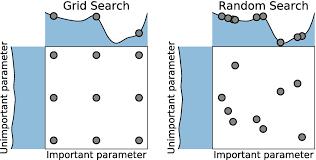

In [40]:
# Берем кусок кода из предыдущего блокнота

from sklearn.model_selection import train_test_split
# Поскольку большая часть наших данных уже масштабирована, мы должны масштабировать столбцы,
# которые остались (Amount и Time)
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler() # Менее чувствителен к выбросам, чем просто стандартизация

X = df.drop('Class', axis=1)
y = df['Class']

original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2,
                                                                                    random_state = 42)


original_Xtrain['scaled_amount'] = rob_scaler.fit_transform(original_Xtrain['Amount'].values.reshape(-1,1))
original_Xtest['scaled_amount'] = rob_scaler.fit_transform(original_Xtest['Amount'].values.reshape(-1,1))

original_Xtrain['scaled_time'] = rob_scaler.fit_transform(original_Xtrain['Time'].values.reshape(-1,1))
original_Xtest['scaled_time'] = rob_scaler.fit_transform(original_Xtest['Time'].values.reshape(-1,1))

original_Xtrain.drop(['Time','Amount'], axis=1, inplace=True)
original_Xtest.drop(['Time','Amount'], axis=1, inplace=True)

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('Распределение классов: \n')
print("Обучающий набор:", train_counts_label/ len(original_ytrain))
print("Тестовый набор:", test_counts_label/ len(original_ytest))

Распределение классов: 

Обучающий набор: [0.99823125 0.00176875]
Тестовый набор: [0.99843755 0.00156245]


In [41]:
# сохраним параметры наших классификаторов, на которых они показали лучших результат с GridSearchCV

#dictionary of classifiers objects which we got in the above cell via GridSearchCV
#with the tuned parameters
tuned_classifiers = {
    "RandomForestClassifier": rf_clf,  # Метод случаного леса
    "GradientBoostingClassifier": gb_clf,  # Градиентный бустинг
    "BernoulliNB": bnb_clf, # Наивный байесовский алгоритм Бернулли
    "LinnearSVC": svc_clf #
}

#Making our Classifiers train with the tuned parameters
for key, classifier in tuned_classifiers.items():
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'{key} Cross Validation Score: {round(score.mean() * 100, 2)}%')

RandomForestClassifier Cross Validation Score: 93.65%
GradientBoostingClassifier Cross Validation Score: 93.9%
BernoulliNB Cross Validation Score: 93.65%
LinnearSVC Cross Validation Score: 93.9%


In [42]:
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Machine learning Pipeline libraries
from imblearn.pipeline import Pipeline

# here we are using the imbalanced dataset
X = df.drop('Class', axis=1)
y = df['Class']

# StratifiedKFold is used for cross validation
# This cross-validation object is a variation of KFold that returns stratified folds.
# The folds are made by preserving the percentage of samples for each class.
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# creating the object for Over Sampling the minority class
over = SMOTE(sampling_strategy=0.01,k_neighbors=5)

# creating the object for Under Sampling the majority class
under = RandomUnderSampler(sampling_strategy=0.5)

# iterating thru the dictionary of tuned classifiers
for key, classifier in tuned_classifiers.items():

    # list of steps to be provided to the ML Pipeline
    steps=[('o',over),('u',under),('model',classifier)]

    # Creating a ML Pipeline
    FiPipeline=Pipeline(steps=steps)

    # Cross validating the classifiers
    scores=cross_val_score(FiPipeline,X,y,cv=sss)

    # Printing the mean accuracy score
    print(f"Classifiers: {key} Has a training score of, {round(scores.mean() * 100, 2)} % accuracy score")

Classifiers: RandomForestClassifier Has a training score of, 99.76 % accuracy score
Classifiers: GradientBoostingClassifier Has a training score of, 99.29 % accuracy score
Classifiers: BernoulliNB Has a training score of, 99.74 % accuracy score
Classifiers: LinnearSVC Has a training score of, 99.77 % accuracy score


In [43]:
# taking a fold of a data to do GridSearchCV for best parameters for SMOTE
for train_index, test_index in sss.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# creating a ML pipeline
model = Pipeline([
        ('sampling', SMOTE(sampling_strategy=0.01)),
        ('Random',RandomUnderSampler(sampling_strategy=0.5)),
        ('classification', rf_clf)
    ])

# Running GridSearchCV on our ML pipeline by varying the k_neighbors from 1 to 10
# to find the best k_neighbors parameter value
# NOTE :- in paramgrid use above key + 2 _ followed by parameter
SMOTE_KN = GridSearchCV(model,{'sampling__k_neighbors':list(range(1,10))})
SMOTE_KN.fit(original_Xtrain,original_ytrain)

print(SMOTE_KN.best_estimator_)
print(SMOTE_KN.best_score_)
print(SMOTE_KN.best_params_)

# Training logistic regression classifier using SMOTE best parameter value for k_neighbors parameter
rf_reg_score = cross_val_score(SMOTE_KN.best_estimator_, original_Xtrain, original_ytrain, cv=5)

# printing the mean accuracy score
print(f'Random Forest Regression Cross Validation Score: {round(rf_reg_score.mean() * 100, 2)}%')

Pipeline(steps=[('sampling', SMOTE(k_neighbors=3, sampling_strategy=0.01)),
                ('Random', RandomUnderSampler(sampling_strategy=0.5)),
                ('classification',
                 RandomForestClassifier(max_depth=7, min_samples_split=5))])
0.9979020905500393
{'sampling__k_neighbors': 3}
Random Forest Regression Cross Validation Score: 99.75%


In [44]:
labels = ['Non Fraud', 'Fraud']

best_est = SMOTE_KN.best_estimator_
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.38      0.89      0.54        98

    accuracy                           1.00     56961
   macro avg       0.69      0.94      0.77     56961
weighted avg       1.00      1.00      1.00     56961



In [45]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Применим SMOTE после кросс-валидации
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [46]:
# Обучим логистическую регрессию
t0 = time.time()
rf_sm = grid_rf.best_estimator_
rf_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Время обучения: {} сек".format(t1 - t0))

Время обучения: 296.2245502471924 сек


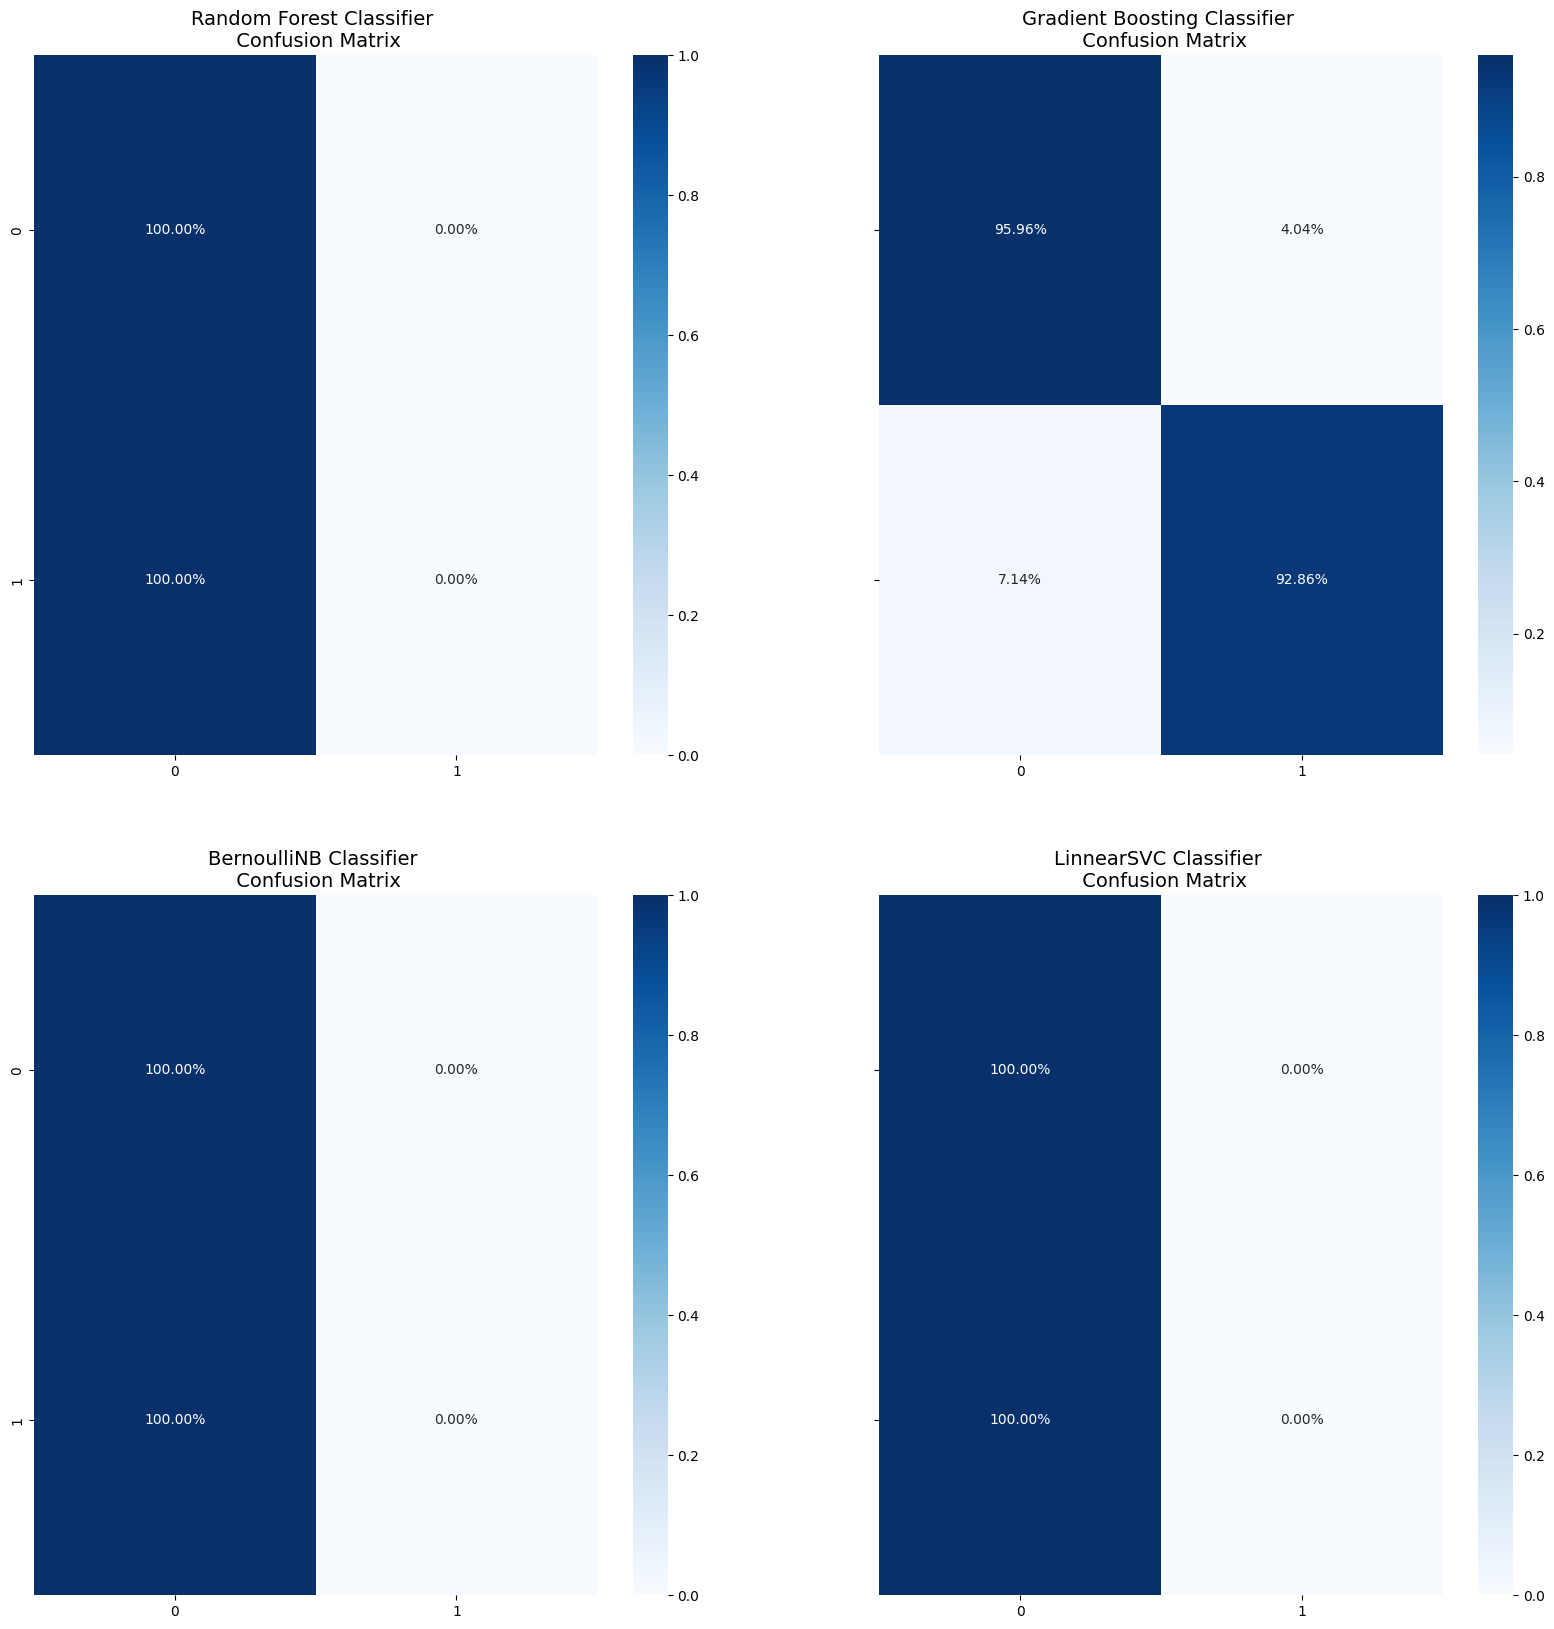

In [47]:
y_pred_rf = best_est.predict(X_test)

# Другие модели
y_pred_gb = gb_clf.predict(X_test)
y_pred_bnb = bnb_clf.predict(X_test)
y_pred_svc = svc_clf.predict(X_test)

rf_cf = confusion_matrix(y_test, y_pred_rf, normalize='true')
gb_cf = confusion_matrix(y_test, y_pred_gb, normalize='true')
bnb_cf = confusion_matrix(y_test, y_pred_bnb, normalize='true')
svc_cf = confusion_matrix(y_test, y_pred_svc, normalize='true')

fig,  ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,20), sharey=True)
# Построим матрицы ошибок
sns.heatmap(ax=ax1, data=rf_cf, annot=True, fmt='.2%', cmap='Blues')
ax1.set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)

sns.heatmap(ax=ax2,data=gb_cf, annot=True, fmt='.2%', cmap='Blues')
ax2.set_title("Gradient Boosting Classifier \n Confusion Matrix", fontsize=14)

sns.heatmap(ax=ax3, data=bnb_cf, annot=True, fmt='.2%', cmap='Blues')
ax3.set_title("BernoulliNB Classifier \n Confusion Matrix", fontsize=14)

sns.heatmap(ax=ax4, data=svc_cf, annot=True,  fmt='.2%', cmap='Blues')
ax4.set_title("LinnearSVC Classifier \n Confusion Matrix", fontsize=14)

plt.show()

Выведем основные метрики моделей.

Давайте вспомним основные метрики качества классификации на примере нашей задачи:

* **Confusion matrix** : так же известна как матрица ошибок, состоит из 4 частей:

    * true positive (TP) : транзакция была мошеннической и модель предсказала ее как мошенническую
    * true negative (TN) : транзакция была нормальной и модель определила ее как нормальную
    * false positive (FP) : транзакция была нормальная, но модель среагировала на нее как на мошенническую
    * false negative (FN) : транзакция была мошенническая, но модель ее пропустила и посчитала нормальной


* **Метрики** :

    * Accuracy : (TP +TN) / (TP + TN + FP +FN)
    * Precision : TP / (TP + FP) (подходит при дисбалансе)
    * Recall : TP / (TP + FN) (подходит при дисбалансе)
    * F1 score : 2 x ((Precision x Recall) / (Precision + Recall)) (подходит при дисбалансе)

* **Roc-кривая** : ROC-кривая строится путем отрисовки графика зависимости частоты истинных положительных результатов (TPR) от частоты ложных положительных результатов (FPR) при различных пороговых значениях.

In [50]:
from sklearn.metrics import classification_report

print('Random Forest Regression:')

y_pred = best_est.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('GradientBoosting Neighbors:')

y_pred = gb_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('BernoulliNB Vector Classifier:')

y_pred = bnb_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

print('LinearSVC Tree Classifier:')

y_pred = svc_clf.predict(original_Xtest)
print(classification_report(original_ytest, y_pred, target_names=labels))

Random Forest Regression:
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.38      0.89      0.54        98

    accuracy                           1.00     56961
   macro avg       0.69      0.94      0.77     56961
weighted avg       1.00      1.00      1.00     56961

GradientBoosting Neighbors:
              precision    recall  f1-score   support

   Non Fraud       1.00      0.88      0.94     56863
       Fraud       0.00      0.05      0.00        98

    accuracy                           0.88     56961
   macro avg       0.50      0.47      0.47     56961
weighted avg       1.00      0.88      0.94     56961

BernoulliNB Vector Classifier:
              precision    recall  f1-score   support

   Non Fraud       1.00      1.00      1.00     56863
       Fraud       0.38      0.88      0.53        98

    accuracy                           1.00     56961
   macro avg       0.69      0.94      0.77

Поскольку мы выбрали Random Forest Classifier в качестве основной модели, давайте сравним ее качество в случае подхода under-sampling и в случае over-sampling.

In [52]:
# Логистическая регрессия с under-sampling
y_pred = rf_clf.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)

# Логистическая регрессия с over-sampling
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d = {'Метод': ['Random Under-Sampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Метод,Score
0,Random Under-Sampling,0.997349
1,Oversampling (SMOTE),0.997367


Итак, в данной задаче, не намного, но эффективнее оказался Oversampling (SMOTE)